# Superstore Performance Dashboard - Exploratory and Descriptive Analysis

In this notebook, we perform an in-depth exploratory and descriptive analysis of the **Superstore Performance Dataset**, a rich dataset capturing retail transaction details across various product categories, regions, and customer segments.

This phase of analysis is crucial for uncovering trends, identifying potential business insights, and gaining a solid understanding of the dataset’s structure before developing visual dashboards or advanced analytics. We explore the distribution of key numerical and categorical variables, examine relationships between sales performance metrics (such as sales, profit, and quantity) and business dimensions (such as region, category, and customer segment), and use visualizations to highlight important patterns. Particular focus is placed on sales performance across regions, product categories, and return behavior, helping to build a strong foundation for actionable recommendations and strategic decision-making.

We begin our analysis by importing the core Python libraries required for data processing, numerical computation, visualization, and directory management:

- **pandas**: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.
- **numpy**: Provides support for numerical operations, array-based computations, and statistical summaries.
- **os**: Facilitates interaction with the file system, allowing us to build flexible and portable directory paths for data and output management.
- **plotly.express**: A high-level graphing library that enables creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import plotly.express as px


## 1. Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.


In [2]:
# Get working directory
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# define paths to the data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
# Define paths to the results folder
results_dir  = os.path.join(project_root_dir, 'results')
# Define paths to the docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# create directories if they do not exist 
os.makedirs(raw_dir, exist_ok = True )
os.makedirs(processed_dir, exist_ok = True )
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## 2. Loading the Cleaned Dataset

We load the cleaned version of the **Superstore Performance Dataset** from the processed data directory into a Pandas DataFrame. The `head(10)` function displays the first ten records, providing a quick look at key columns such as `Customer ID`, `Segment`, `Country`, `Category`, `Sales`, `Profit`, and `Returned`.


In [3]:
store_data_filename = os.path.join(processed_dir, "SuperStore-Cleaned.csv")
super_df = pd.read_csv(store_data_filename)
super_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NO,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NO,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NO,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NO,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NO,Cassandra Brandow
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,NO,Anna Andreadi
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,NO,Anna Andreadi
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,NO,Anna Andreadi
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,NO,Anna Andreadi
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,NO,Anna Andreadi


## 3. Dataset Dimensions and Data Types

Here, we examine the structure of the Superstore dataset:

- The dataset contain9,994,537** entries an23**17** variables.
- It includes both **numerical** variables (e.g., `Sales`, `Profit`, `Quantity`, `Discount`) and **categorical** variables (e.g., `Customer ID`, `Segment`, `Region`, `Category`, `Returned`).

Understanding the data types and identifying any null entries is essential before performing detailed analysis, as it guides data cleaning, transformation, and visualization decisions.


In [4]:
super_df.shape

(9994, 23)

In [5]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 4. Summary Statistics: Numerical Variables

This summary provides a snapshot of the distribution and spread of key numerical variables in the Superstore dataset. Below are the main insights:

- **Sales** values range fom **$ 0.4 4 to $22,63848**, with a meanof **$22.86**. The large gap between the mean and maximum suggests a right-skewed distribution, where a few high-value sales significantly impact the average. This is typical in retail, where large orders or bulk items create outliers.

- **Profit** also exhibits a wide range,from **–$6,599.98 (a oss)* to **$8,399.98 (again)**. The mean proft is **$8 .66**, with a standard deviation of   ver *$  234**, indicating large variability. The presence of negative values shows that some transactions resulted in financial losses, possibly due to heavy discounts, returns, or operational costs exceeding sales.

- **Discount** values range between **0.0 and 0.8**, with a mean of **0.16**. This suggests that most transactions occur with low to moderate discount rates. The 25th percentile is 0, which indicates that many orders are sold at full price, while a portion receives promotional pricing.

- **Quantity** of products sold per transaction ranges from **1 to 14**, with a median of **3 units**. Most purchases involve small quantities, reflecting individual or household-level buying behavior.

- **Postal Code**, while numeric in format, represents geographical location and is more appropriately treated as a categorical or identifier column rather than a variable for numerical analysis.

- **Row ID** is a simple index from **1 to 9994**, primarily used for tracking rows and not relevant for analysis.

### Descriptive Statistics Table (for key numerical variables)

| Variable      | Min     | 25%     | Median  | Mean     | 75%     | Max       |
|---------------|---------|---------|---------|----------|---------|-----------|
| Sales         | 0.44    | 17.28   | 54.49   | 229.86   | 209.94  | 22,638.48 |
| Quantity      | 1       | 2       | 3       | 3.79     | 5       | 14        |
| Discount      | 0.0     | 0.0     | 0.2     | 0.16     | 0.2     | 0.8       |
| Profit        | -6,599.98 | 1.73  | 8.67    | 28.66    | 29.36   | 8,399.98  |

Understanding these patterns helps uncover outliers, pricing strategies, and customer purchasing behavior — providing a data-driven foundation for improving performance, managing profit margins, and identifying risk areas in sales.
strategies.


In [6]:
super_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 5. Categorical Variables

In [7]:
super_df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Returned,Person
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850,2,4
top,CA-2017-100111,2016-09-05,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NO,Anna Andreadi
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,9194,3203


In [8]:
super_df['Ship Mode'].value_counts(normalize=True)

Ship Mode
Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: proportion, dtype: float64

In [9]:
super_df['Segment'].value_counts(normalize=True)

Segment
Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: proportion, dtype: float64

In [10]:
super_df['City'].value_counts(normalize=True)

City
New York City      0.091555
Los Angeles        0.074745
Philadelphia       0.053732
San Francisco      0.051031
Seattle            0.042826
                     ...   
Glenview           0.000100
Missouri City      0.000100
Rochester Hills    0.000100
Palatine           0.000100
Manhattan          0.000100
Name: proportion, Length: 531, dtype: float64

In [11]:
super_df['Region'].value_counts(normalize=True)

Region
West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: proportion, dtype: float64

In [12]:
super_df['Sub-Category'].value_counts(normalize=True)

Sub-Category
Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Art            0.079648
Accessories    0.077547
Chairs         0.061737
Appliances     0.046628
Labels         0.036422
Tables         0.031919
Envelopes      0.025415
Bookcases      0.022814
Fasteners      0.021713
Supplies       0.019011
Machines       0.011507
Copiers        0.006804
Name: proportion, dtype: float64

## 6. Categorical Variables Summary

### Ship Mode
The **Standard Class** is the most commonly used shipping method, representing approximately **59.7%** of all orders. This reflects customer preference or company policy favoring cost-effective delivery. **Second Class** (19.5%) and **First Class** (15.4%) follow, while **Same Day** shipping is the least common at **5.4%**, likely due to its higher cost or limited availability.

### Segment
The **Consumer** segment dominates the customer base, accounting for around **52%** of orders. **Corporate** customers represent about **30%**, while the **Home Office** segment makes up the remaining **18%**. This distribution suggests that the business primarily serves individual consumers, but corporate and home office clients still form significant portions of the market.

### Region
The dataset is fairly balanced across regions, with the **West** holding the largest share at **32%**, followed by the **East** at **28%**, **Central** at **23%**, and **South** at **16%**. This regional distribution reflects the geographical spread of the business’s customer base.

### City
The dataset includes orders from **531 unique cities**. The top contributors are **New York City (9.2%)**, **Los Angeles (7.5%)**, **Philadelphia (5.4%)**, **San Francisco (5.1%)**, and **Seattle (4.3%)**. The remaining cities each contribute a small fraction of the total orders, indicating a broad but uneven geographical coverage.

### Sub-Category
Among product sub-categories:
- **Binders (15.2%)** and **Paper (13.7%)** are the most frequently sold items, reflecting strong demand for basic office supplies.
- **Furnishings (9.6%)**, **Phones (8.9%)**, and **Storage (8.5%)** also have notable shares.
- Lower-volume categories include **Machines (1.2%)** and **Copiers (0.7%)**, which may represent high-value but low-frequency purchases.


# 7. Category Distribution 

In [13]:
super_df_category = super_df.groupby('Category').size().reset_index(name = 'total')
super_df_category

,Category,total
0,Furniture,2121
1,Office Supplies,6026
2,Technology,1847


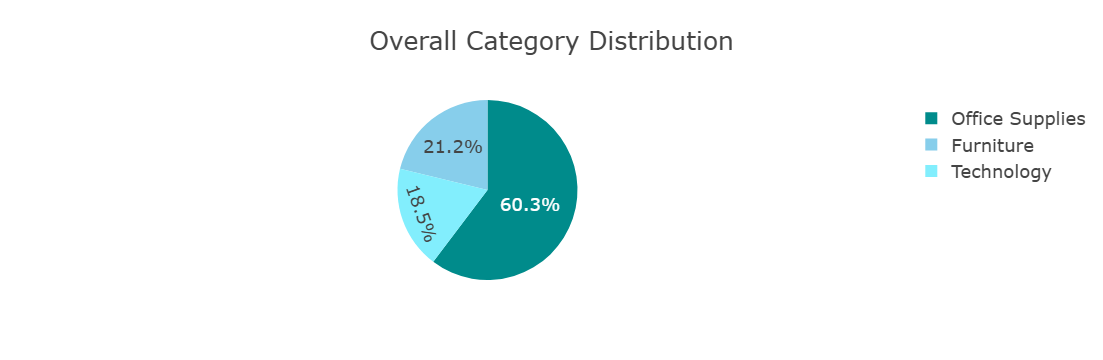

In [14]:
fig = px.pie(super_df_category, names='Category', values='total', title='Overall Category Distribution', 
             color_discrete_sequence=['darkcyan','skyblue','#82EEFD'])
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir,'distribution_category_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'distribution_category_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'distribution_category_pie_chart.html'))

This pie chart shows the overall category distribution:

- **Furniture:** 2,121 transactions  
- **Office Supplies:** 6,026 transactions  
- **Technology:** 1,847 transactions  

Office Supplies dominate the sales volume, accounting for the majority of transactions. Furniture and Technology make up smaller but significant portions of the total sales. This distribution highlights where customer demand is concentrated across product categories.


## 8. Sales Distribution by Category

In [15]:
sales_by_category = super_df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category 

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


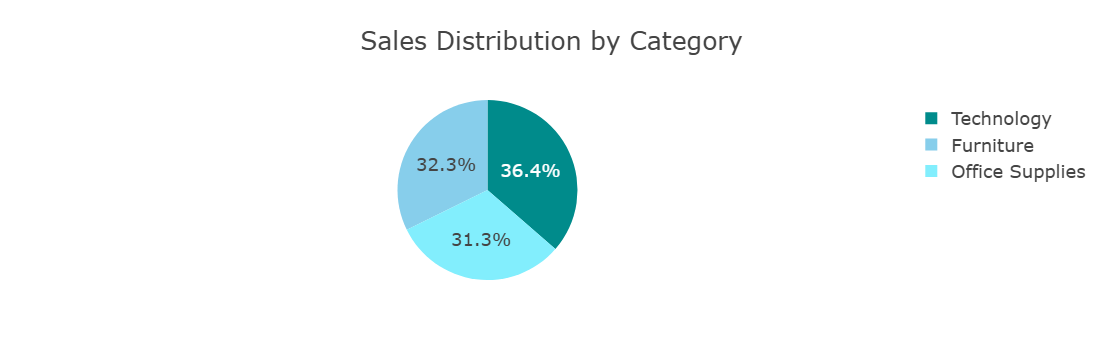

In [16]:
fig = px.pie(sales_by_category, names='Category', values='Sales', title='Sales Distribution by Category', 
             color_discrete_sequence=['darkcyan','skyblue','#82EEFD'])
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir,'sales_distribution_category_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'sales_distribution_category_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'sales_distribution_category_pie_chart.html'))

This pie chart shows the sales distribution by category:

- **Furniture:** $741,999.80

- **Office Supplies:**  $719,047.03
  
- **Technology:** $836,154.03  

Technology leads in total sales value, followed closely by Furniture and Office Supplies. This distribution highlights the revenue contributions of each category and helps identify key drivers of overall sales performance.


## 9. Sales Distribution by Sub-Category

In [17]:
sales_by_sub_category = super_df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)
sales_by_sub_category 

,Sub-Category,Sales
8,Fasteners,3024.2800
10,Labels,12486.3120
7,Envelopes,16476.4020
2,Art,27118.7920
15,Supplies,46673.5380
12,Paper,78479.2060
9,Furnishings,91705.1640
1,Appliances,107532.1610
4,Bookcases,114879.9963
6,Copiers,149528.0300


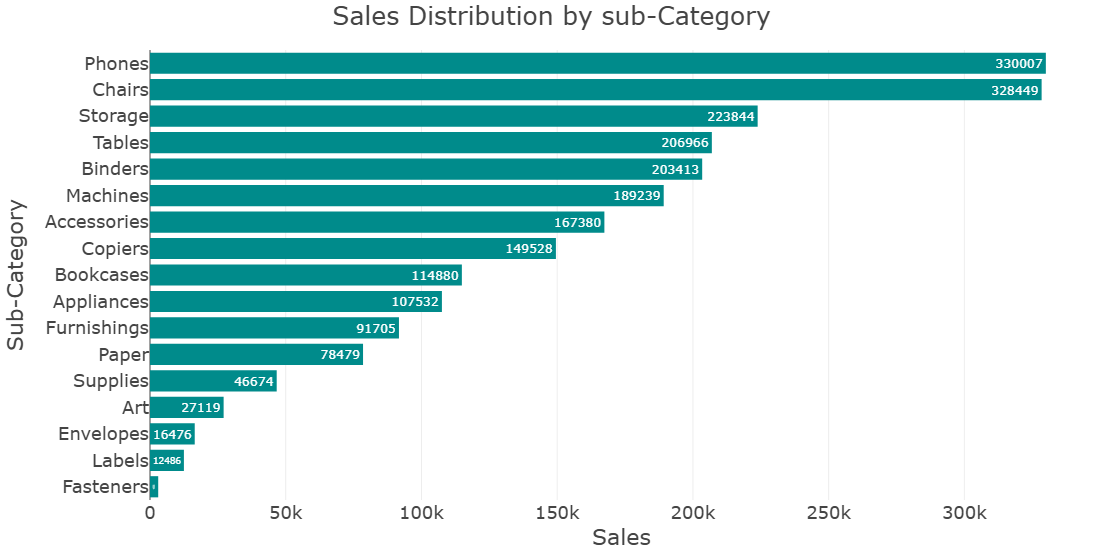

In [18]:
fig = px.bar(sales_by_sub_category, 
             x ='Sales', 
             y ='Sub-Category', title='Sales Distribution by sub-Category', 
             color_discrete_sequence=['darkcyan'],
             orientation='h',
            height= 550,
             text = 'Sales',
            width= 900)
fig.update_traces(texttemplate='%{x:.0f}', textposition = 'inside')
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)",
                 margin = dict(l=150, r=10, t=50, b=50))
fig.show()
fig.write_image(os.path.join(results_dir,'sales_distribution_sub_category_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'sales_distribution_sub_category_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'sales_distribution_sub_category_bar_plot.html'))

This bar chart shows the sales distribution by product sub-category:

- **Fasteners:** $3,024.28
  
- **Labels:** $12,486.31
  
- **Envelopes:** $16,476.40
   
- **Art:** $27,118.79
  
- **Supplies:** $46,673.54
  
- **Paper:** $78,479.21
   
- **Furnishings:** $91,705.16
  
- **Appliances:** $107,532.16
  
- **Bookcases:** $114,880.00
  
- **Copiers:** $149,528.03
  
- **Accessories:** $167,380.32
  
- **Machines:** $189,238.63
  
- **Binders:** $203,412.73
   
- **Tables:** $206,965.53
  
- **Storage:** $223,843.61
   
- **Chairs:** $328,449.10
  
- **Phones:** $330,007.05  

The sales distribution highlights that **Phones**, **Chairs**, and **Storage** are among the highest revenue-generating sub-categories, while **Fasteners** and **Labels** contribute smaller portions. This insight helps prioritize inventory and marketing focus on the most lucrative product lines.


## 10. Sales Distribution by Ship Mode

In [19]:
sales_by_sub_ship = super_df.groupby('Ship Mode')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)
sales_by_sub_ship

,Ship Mode,Sales
1,Same Day,1.283631e+05
0,First Class,3.514284e+05
2,Second Class,4.591936e+05
3,Standard Class,1.358216e+06


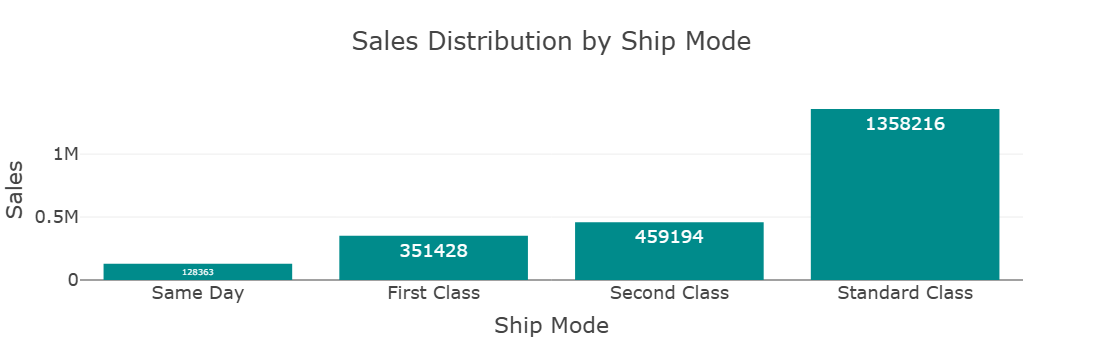

In [20]:
fig = px.bar(sales_by_sub_ship, 
             x='Ship Mode', 
              y='Sales', title='Sales Distribution by Ship Mode', 
             color_discrete_sequence=['darkcyan'],
             orientation='v',
             text='Sales'
            )
fig.update_traces(texttemplate='%{y:.0f}', textposition = 'inside')
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)",)
fig.show()
fig.write_image(os.path.join(results_dir,'sales_distribution_shipmode_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'sales_distribution_shipmode_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'sales_distribution_shipmode_bar_plot.html'))

This bar chart shows the sales distribution by Ship Mode:

- **Same Day:** $128,363
  
- **First Class:** $351,428
  
- **Second Class:** $459,193
  
- **Standard Class:** $1,358,216 

The distribution indicates that **Standard Class** dominates sales volume by a large margin, followed by Second Class and First Class. Same Day shipping accounts for the smallest portion of sales, reflecting its limited use or higher cost.


## 11. Sales Distribution by Region

In [21]:
sales_by_region = super_df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)
sales_by_region

,Region,Sales
2,South,391721.9050
0,Central,501239.8908
1,East,678781.2400
3,West,725457.8245


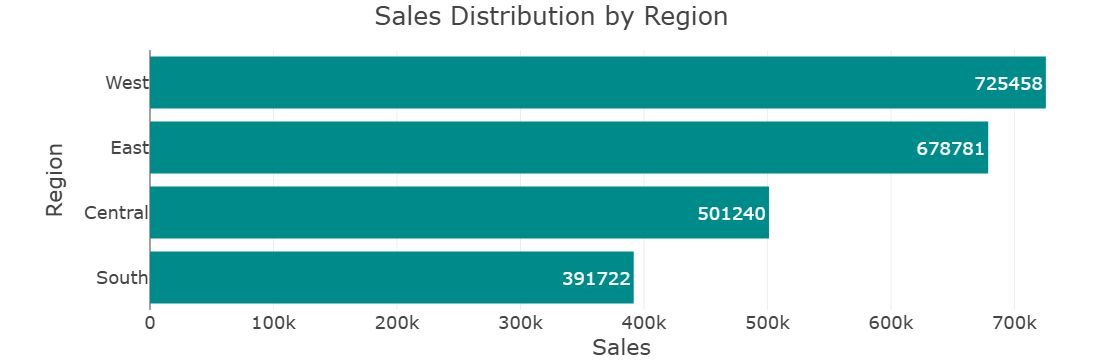

In [22]:
fig = px.bar(sales_by_region, 
             x='Sales', 
             y='Region', title='Sales Distribution by Region', 
             color_discrete_sequence=['darkcyan'],
             text='Sales'
            )
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)", margin = dict(l=150, r=10, t=50, b=50))
fig.update_traces(texttemplate='%{x:.0f}', textposition = 'inside')
fig.show()
fig.write_image(os.path.join(results_dir,'sales_distribution_region_bar_ploty.jpg'))
fig.write_image(os.path.join(results_dir,'sales_distribution_region__bar_ploty.png'))
fig.write_html(os.path.join(results_dir,'sales_distribution_region__bar_ploty.html'))

This bar chart shows the sales distribution by Region:

- **South:** $391,721

- **Central:** $501,239

- **East:** $678,781
           
- **West:** $725,457 

The data shows that the **West** region generates the highest sales, followed closely by the **East** region. The **Central** and **South** regions contribute smaller but significant portions to total sales, highlighting regional differences in market size or customer demand.


# 12. Customer Segment Distribution

In [23]:
customer_segment = super_df.groupby('Segment').size().reset_index(name = 'total')
customer_segment

,Segment,total
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


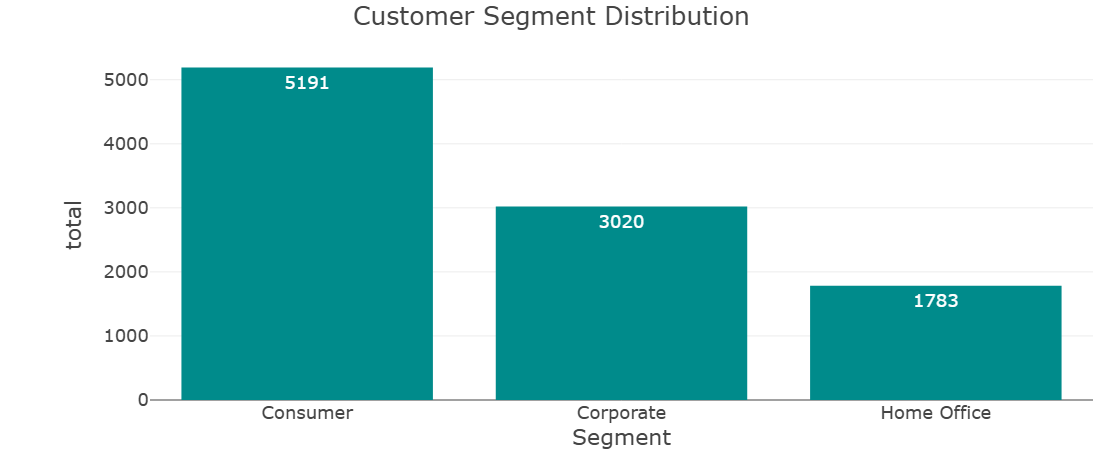

In [24]:
fig = px.bar(customer_segment, 
             x ='Segment', 
             y ='total', title='Customer Segment Distribution', 
             color_discrete_sequence=['darkcyan'],
             orientation='v',
            height= 450,
             text = 'total',
            width= 600)
fig.update_traces(textposition = 'inside')
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)",
                 margin = dict(l=150, r=10, t=50, b=50))
fig.show()
fig.write_image(os.path.join(results_dir,'customersegment_distribution_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'customersegment_distribution_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'customersegment_distribution_bar_plot.html'))

## 13. Customer Segment Distribution

This bar chart shows the distribution of customers across segments:

- **Consumer:** 5,191 customers
  
- **Corporate:** 3,020 customers
  
- **Home Office:** 1,783 customers  

The Consumer segment represents the largest group, accounting for over half of the customer base. Corporate clients form a significant portion, while Home Office customers make up the smallest segment. This distribution provides insight into the primary market focus of the business.


# 14. Monthly Sales Distribution

In [25]:
super_df['Order Date'] = pd.to_datetime(super_df['Order Date'])
super_df['Month'] = super_df['Order Date'].dt.month_name()
super_df['Month_num'] = super_df['Order Date'].dt.month
super_df['Month_num']

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: Month_num, Length: 9994, dtype: int32

In [26]:
sales_by_month = super_df.groupby(['Month_num', 'Month'])['Sales'].sum().reset_index()
sales_by_month = sales_by_month.sort_values('Month_num')
sales_by_month

,Month_num,Month,Sales
0,1,January,94924.8356
1,2,February,59751.2514
2,3,March,205005.4888
3,4,April,137762.1286
4,5,May,155028.8117
5,6,June,152718.6793
6,7,July,147238.0970
7,8,August,159044.0630
8,9,September,307649.9457
9,10,October,200322.9847


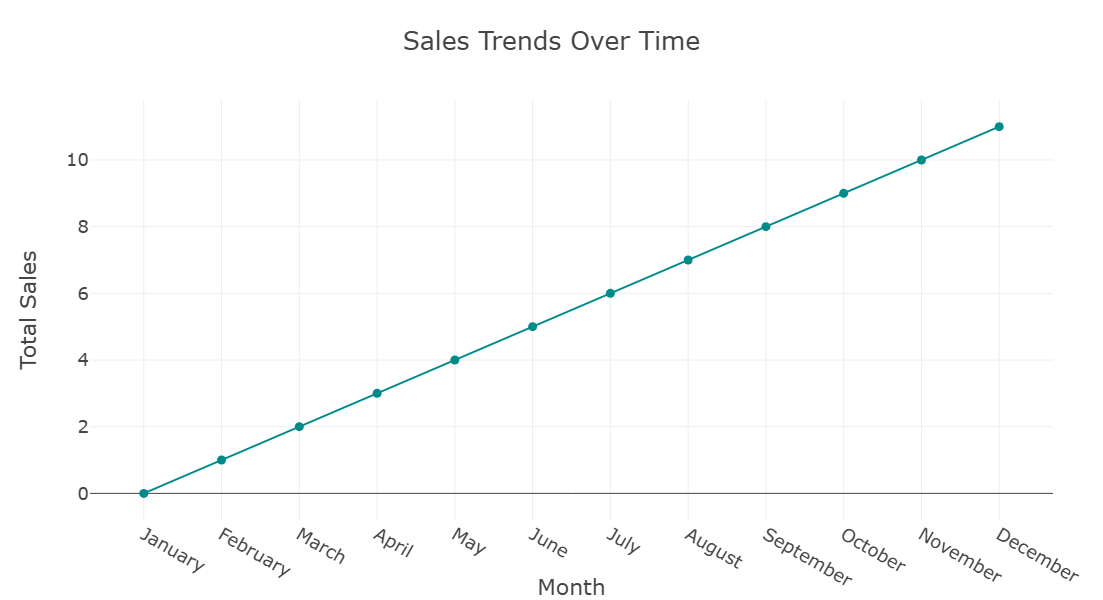

In [27]:
fig = px.line(
    sales_by_month,
    x='Month',
    y='Sales',
    title='Sales Trends Over Time',
    width= 1000,
    height= 600,
    markers=True
)

fig.update_traces(line=dict(color='darkcyan', width=2),)
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales',
    template='presentation',
     margin = dict(l=90, r=50)
)

fig.show()
fig.write_image(os.path.join(results_dir,'salesovertime_line_chart.jpg'))
fig.write_image(os.path.join(results_dir,'salesovertime_line_chart.png'))
fig.write_html(os.path.join(results_dir,'salesovertime_line_chart.html'))

## 15. Monthly Sales Distribution

This pie chart shows the distribution of total sales across months:

- **January:** $94,924
  
- **February:** $59,751
  
- **March:** $205,005
   
- **April:** $137,762
    
- **May:** $155,028
   
- **June:** $152,718
  
- **July:** $147,238
  
- **August:** $159,044
   
- **September:** $307,649
   
- **October:** $200,322
    
- **November:** $352,461
  
- **December:** $325,293

The distribution shows that **November** and **December** generate the highest sales, reflecting seasonal peaks, likely driven by year-end promotions and holiday shopping. **September** also stands out as a strong sales month. In contrast, **February** and **January** have the lowest sales, possibly due to post-holiday slowdowns. These trends highlight key periods for targeted marketing and inventory planning.
